In [39]:
from pymongo import MongoClient
from matplotlib import pyplot as plt
import numpy as np
from dcase2020_task2.data_sets.mcm_dataset import INVERSE_CLASS_MAP, TRAINING_ID_MAP, CLASS_MAP

import pandas as pd
import json

baseline_auc = { 
    'name': 'baseline',
    0: {0: 0.5441, 2: 0.7340, 4: 0.6161, 6: 0.7392},
    1: {0: 0.6715, 2: 0.6153, 4: 0.8833, 6: 0.7455},
    2: {0: 0.9619, 2: 0.7897, 4: 0.9430, 6: 0.6959},
    3: {1: 0.8136, 2: 0.8597, 3: 0.6330, 4: 0.8445},
    4: {1: 0.7807, 2: 0.6416, 3: 0.7535},
    5: {0: 0.6876, 2: 0.6818, 4: 0.7430, 6: 0.5390}
    }
    
baseline_pauc = {
    'name': 'baseline',
    0: {0: 0.4937, 2: 0.5481, 4: 0.5326, 6: 0.5235},
    1: {0: 0.5674, 2: 0.5810, 4: 0.6710, 6: 0.5802},
    2: {0: 0.8144, 2: 0.6368, 4: 0.7198, 6: 0.4902},
    3: {1: 0.6840, 2: 0.7772, 3: 0.5521, 4: 0.6897},
    4: {1: 0.6425, 2: 0.5601, 3: 0.6103},
    5: {0: 0.5170, 2: 0.5183, 4: 0.5197, 6: 0.4843}
}

global result

def get_experiment(runs, name, metric='auroc_mean'):
    experiment_dict = dict()
    for i in range(6):
        experiment_dict[i] = dict()
    
    experiment_dict['name'] = name
    experiment_dict['metric'] = metric
    if metric == 'auroc_mean':
        metirc_idx = 0
    elif metric == 'pauroc_mean':
        metirc_idx = 1
    elif metric == 'auroc_max':
        metirc_idx = 2
    elif metric == 'pauroc_max':
        metirc_idx = 3
    else:
        raise AttributeError
    
    for experiment in runs:
        if experiment['config'].get('descriptor') == name:
            machine_dict = experiment_dict.get(experiment['config']['machine_type'])
            result = experiment.get('result')
            machine_type = INVERSE_CLASS_MAP[experiment['config']['machine_type']]
            machine_id = experiment['config']['machine_id']
            
            if result:
                machine_dict[experiment['config']['machine_id']] = result.get(
                    machine_type, {}
                ).get(
                    f'json://{machine_id}', -1
                )['py/tuple'][metirc_idx]
            else:
                machine_dict[experiment['config']['machine_id']] = 0
    return experiment_dict


def get_record(experiment):
    record = [experiment['name']]
    for i in range(6):
        for j in TRAINING_ID_MAP[i]:
                v = experiment.get(i)
                if v:
                    v = v.get(j, 1)
                else:
                    v = 1
                record.append(v)
    assert len(record) == 24
    return  record

In [28]:
client = MongoClient('mongodb://student2.cp.jku.at:27017/')
#experiments_made = [r for r in client.dcase2020_2_madog.runs.find({"experiment.name": "dcase2020_task2_BaselineExperiment"})]
experiments = [r for r in client.dcase2020_task2_ae_baseline_gridsearch.runs.find({"experiment.name": "dcase2020_task2_BaselineExperiment"})]

In [40]:
descriptors = set()
for experiment in experiments:
    descriptors = descriptors.union(set([experiment['config']['descriptor']]))
len(descriptors)

24

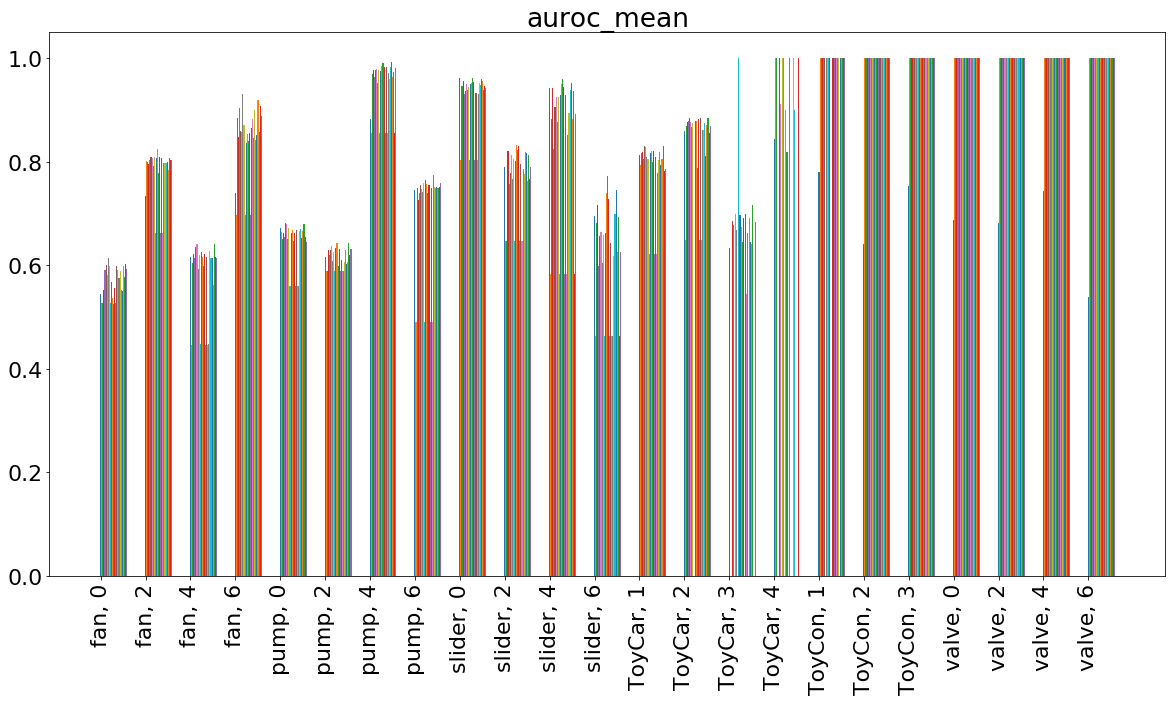

In [42]:
metric = 'auroc_mean'
bar_width = 0.6
bar_spacing=0.00

data = [get_record(baseline_auc)]

for descriptor in descriptors:
    data.append(
        get_record(
            get_experiment(
                experiments, 
                descriptor, 
                metric=metric
            )
        )
    )

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.title(f'{metric}')
labels = []
for i in range(6):
    for j in TRAINING_ID_MAP[i]:
        labels.append("{}, {}".format(INVERSE_CLASS_MAP[i][:6], j))

for i, d in enumerate(data):
    plt.bar(
        np.arange(len(labels)) + i * (bar_width / len(data) + bar_spacing), 
        d[1:],
        bar_width/ len(data),
        label=d[0]
    )

plt.xticks(np.arange(len(labels)), labels, rotation='vertical')
#plt.legend(loc='lower center')
plt.show()

[['baseline',
  0.5441,
  0.734,
  0.6161,
  0.7392,
  0.6715,
  0.6153,
  0.8833,
  0.7455,
  0.9619,
  0.7897,
  0.943,
  0.6959,
  0.8136,
  0.8597,
  0.633,
  0.8445,
  0.7807,
  0.6416,
  0.7535,
  0.6876,
  0.6818,
  0.743,
  0.539],
 ['B', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 ['F', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 ['t', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [']', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 ['a', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 ['g', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 ['3', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 ['c', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 ['2', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 ['T', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 